<a href="https://colab.research.google.com/github/N1colasFD/Data_science_aplicada_reto_twitter/blob/main/Reto_mr_chips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando Data science a este reto

Imagina 50.000 goles almacenados así

Busco la pareja goleador-asistente que más veces le marcó a un mismo portero de un mismo equipo



In [90]:
#importacion archivo
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [91]:
import pandas as pd

In [92]:
%matplotlib inline
pd.options.display.min_rows = 12

In [93]:
df = pd.read_excel('/content/drive/MyDrive/Programacion/Bases de datos/Reto_mr_chips_twitter.xlsx')
df.head()

,ID GOL,GOLEADOR,club_goledor,asistencia,portero,club_portero
0,9459,DZEKO,lnter Milan,"CORREA, CJ.","STANEK, J.",FC Viktoria Plzen
1,9460,"DUMFRIES, D.",lnter Milan,DZEKO,"STANEK, J.",FC Viktoria Plzen
2,9461,PAULINHO J.,Sporting CP,"GONCALVES, P.",LLORIS,Tottenham Hotspur FC
3,9462,ARTHUR GOMES,Sporting CP,NaN,LLORIS,Tottenham Hotspur FC
4,9463,"JUTGLA, F.",Club Brugge KV,NaN,DIOGO COSTA,FC Porto


Como la tabla solo tiene 40 registros, realizaremos un codigo para aumentar aleatoriamente los datos a 50.000 ⚾

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID GOL        41 non-null     int64 
 1   GOLEADOR      41 non-null     object
 2   club_goledor  41 non-null     object
 3   asistencia    32 non-null     object
 4   portero       41 non-null     object
 5   club_portero  41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [95]:
#1. Renombremos unas variables
df.rename(columns = {'ID GOL':'id_gol',
          'GOLEADOR':'goleador'}, inplace = True)

#podriamos usar Janitor, pero no son muchas variables, asi pues usaremos un metodo mas 'simple' 

In [96]:
df.head(2)

,id_gol,goleador,club_goledor,asistencia,portero,club_portero
0,9459,DZEKO,lnter Milan,"CORREA, CJ.","STANEK, J.",FC Viktoria Plzen
1,9460,"DUMFRIES, D.",lnter Milan,DZEKO,"STANEK, J.",FC Viktoria Plzen


In [97]:
#2. Realizamos una inspeccion del tipo de variable. 
df.dtypes
# Todo bien 

id_gol           int64
goleador        object
club_goledor    object
asistencia      object
portero         object
club_portero    object
dtype: object

In [98]:
#3. Comprobamos si los nulos afectaran nuestro diagnostico
df.isna().mean().sort_values(ascending = False) * 100
#todo bien

asistencia      21.95122
id_gol           0.00000
goleador         0.00000
club_goledor     0.00000
portero          0.00000
club_portero     0.00000
dtype: float64

## podriamos quedarnos realizando Calidad de los datos pero por ahora pasemos al codigo que multiplicara el dataframe

In [99]:
from random import sample

#creamos un nuevo DataFrame
Df_5k = pd.DataFrame()

In [100]:
#Creamos un ciclo FOR que recorra el df original 5000
for i in range(5000):
#usamos la funcion concat y sample Dejo la documentacion
  Df_5k = pd.concat([Df_5k, df.sample(10)], ignore_index = True)

https://www.geeksforgeeks.org/python-random-sample-function/

In [101]:
Df_5k.head(20)

,id_gol,goleador,club_goledor,asistencia,portero,club_portero
0,9499,GNABRY,Bayern München,GORETZKA,"TVRDON, M.",FC Viktoria Plzen
1,9490,"OKAFOR, N.",Red Bull Salzb.,"CHUKWUBUIKE, A.",ARRIZABALAGA,Chelsea FC
2,9462,ARTHUR GOMES,Sporting CP,NaN,LLORIS,Tottenham Hotspur FC
3,9460,"DUMFRIES, D.",lnter Milan,DZEKO,"STANEK, J.",FC Viktoria Plzen
4,9486,BELLINGHAM,BV Borussia,REUS,EDERSON S.,Manchester City FC
5,9476,"MUDRYK, M.",FK Shakhtar,"SUDAKOV, H.","HART, J.",Celtic FC
6,9484,JOAO MARIO,SL Benfica,NaN,"PERIN, M.",Juventus FC
7,9478,SAELEMAEKERS,AC Milan,RAIFAEL LEAO,"LIVAKOVIC, D.",NK Dinamo
8,9473,"NORDBY, A.",Club Brugge KV,"NIELSEN, C.",DIOGO COSTA,FC Porto
9,9479,"ORSIC, M.",NK Dinamo,"PETKOVIC, B.","MAIGNAN, M.",AC Milan


In [102]:
Df_5k.shape   #correcto 

(50000, 6)

In [103]:
import matplotlib.pyplot as plt #haremos unos graficos sencillos

In [104]:
# 3 aca ya podemos ver una primera muestra por la opcion rank 
Df_5k['Raking'] = Df_5k['goleador'].rank(method = 'first', ascending = False)

#Comprobamos
Df_5k.sort_values(by = 'Raking').head(10) #puede probar con Head 50 




,id_gol,goleador,club_goledor,asistencia,portero,club_portero,Raking
15,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,1.0
26,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,2.0
54,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,3.0
89,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,4.0
102,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,5.0
122,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,6.0
197,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,7.0
249,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,8.0
265,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,9.0
303,9491,VALVERDE D.,Real Madrid CF,VINICIUS JR.,"GULACS I, P.",RB Leipzig,10.0


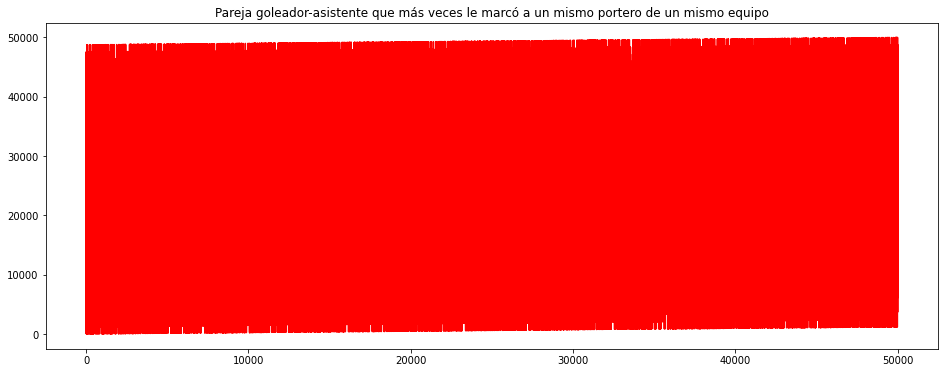

In [108]:
Df_5k.Raking.plot.line(figsize = (16,6),
                       title = 'Pareja goleador-asistente que más veces le marcó a un mismo portero de un mismo equipo',
                       color = 'red');

In [116]:
Df_5k.value_counts(dropna=False, normalize=True)

id_gol  goleador    club_goledor      asistencia    portero     club_portero        Raking 
9459    DZEKO       lnter Milan       CORREA, CJ.   STANEK, J.  FC Viktoria Plzen   40292.0    0.00002
9486    BELLINGHAM  BV Borussia       REUS          EDERSON S.  Manchester City FC  46825.0    0.00002
                                                                                    46803.0    0.00002
                                                                                    46804.0    0.00002
                                                                                    46805.0    0.00002
                                                                                    46806.0    0.00002
                                                                                                ...   
9472    DIABY , M.  Bayer Leverkusen  FRIMPONG, J.  GRBIC, l.   Atlético Madrid     43531.0    0.00002
                                                                                    

In [81]:
Agrupacion = (Df_5k
.assign(club_portero = lambda df_: df_[['portero', 'club_portero']].agg(','.join, axis = 1))
.groupby(['goleador','asistencia'])
.club_portero
.value_counts()
.sort_values(ascending=False)
) 

In [82]:
Agrupacion.head(10)

goleador      asistencia       club_portero              
NEYMAR        VERRATT I        COHEN, J.,Maccabi Haifa FC    1279
NDOMBELE, T.  Z. ANGUISSA      MCGREGOR,Rangers FC           1260
POBEGA, T.    THEO HDEZ.       LIVAKOVIC, D.,NK Dinamo       1260
VALVERDE D.   VINICIUS JR.     GULACS I, P.,RB Leipzig       1257
SALAH         JOTA, D.         PASVEER, R.,AFC Ajax          1255
OKAFOR, N.    CHUKWUBUIKE, A.  ARRIZABALAGA,Chelsea FC       1254
STERLING      AUBA MEYANG      KOHN, P.,Red Bull Salzb.      1251
KUDUS, M.     BERGWIJN         ALISSON,Liverpool FC          1242
MBAPPE, K.    MESSI            COHEN, J.,Maccabi Haifa FC    1241
CHERY, T.     HAZIZA , D.      DONNARUMMA , G.,PSG FC        1239
Name: club_portero, dtype: int64

In [83]:
Df_5k['goleador'].value_counts()

SANE, L.          2483
NEYMAR            1279
NDOMBELE, T.      1260
POBEGA, T.        1260
VALVERDE D.       1257
SALAH             1255
OKAFOR, N.        1254
NERES, D.         1253
MESSI             1252
STERLING          1251
GIROUD            1242
KUDUS, M.         1242
MBAPPE, K.        1241
CHERY, T.         1239
BELLINGHAM        1235
SKOV OLSEN        1233
MAT IP            1231
ORSIC, M.         1228
NORDBY, A.        1220
STONES, J.        1219
MARCO ASENSIO     1217
LUCAS             1216
HALAND , E.       1216
POLITANO, M.      1215
JUTGLA, F.        1215
SOWAH, K.         1212
DZEKO             1207
RASPADO R!, G.    1203
MILIK             1199
MUDRYK, M.        1198
ARTHUR GOMES      1196
JOAO MARIO        1194
DUMFRIES, D.      1193
SAELEMAEKERS      1190
ANDRICH, R.       1188
GNABRY            1181
BONDARENKO, A.    1172
PAULINHO J.       1170
LINDSTROM, J.     1160
DIABY , M.        1124
Name: goleador, dtype: int64

In [84]:
Df_5k.iloc[15457]

id_gol                  9497
goleador        NDOMBELE, T.
club_goledor      SSC Napoli
asistencia       Z. ANGUISSA
portero             MCGREGOR
club_portero      Rangers FC
goleador_            22569.0
Name: 15457, dtype: object

In [88]:
Df_5k.groupby(['goleador','asistencia']).portero.value_counts().sort_values(ascending = True)

goleador        asistencia       portero        
DIABY , M.      FRIMPONG, J.     GRBIC, l.          1124
PAULINHO J.     GONCALVES, P.    LLORIS             1170
BONDARENKO, A.  HATATE, R.       TRUBIN, A.         1172
GNABRY          GORETZKA         TVRDON, M.         1181
ANDRICH, R.     FRIMPONG, J.     GRBIC, l.          1188
SAELEMAEKERS    RAIFAEL LEAO     LIVAKOVIC, D.      1190
DUMFRIES, D.    DZEKO            STANEK, J.         1193
MUDRYK, M.      SUDAKOV, H.      HART, J.           1198
MILIK           PAREDES, L.      VLACHOD IMOS       1199
RASPADO R!, G.  OLIVERA , M.     MCGREGOR           1203
DZEKO           CORREA, CJ.      STANEK, J.         1207
SANE, L.        MIUSIALA, J.     TER STEGEN         1212
SOWAH, K.       JUTGLA, F.       DIOGO COSTA        1212
HALAND , E.     CANCELO, J.      MEYER, A.          1216
LUCAS           KIMMICH, J.      TER STEGEN         1216
MARCO ASENSIO   KROOS            GULACS I, P.       1217
STONES, J.      DE BRUYNE        MEYER,

In [86]:
Df_5k[['goleador','asistencia','portero']]

,goleador,asistencia,portero
0,"RASPADO R!, G.","OLIVERA , M.",MCGREGOR
1,SKOV OLSEN,"MEIJER , B.",DIOGO COSTA
2,JOAO MARIO,NaN,"PERIN, M."
3,ARTHUR GOMES,NaN,LLORIS
4,PAULINHO J.,"GONCALVES, P.",LLORIS
5,LUCAS,"KIMMICH, J.",TER STEGEN
...,...,...,...
49994,MAT IP,"TSIMIKAS, K.","PASVEER, R."
49995,"POLITANO, M.",NaN,MCGREGOR
49996,"MBAPPE, K.",MESSI,"COHEN, J."
